# Deep Learning - Part 1

#### Content

1. Mathematical Building Blocks of a Neuronal Network
    1. Tensors and Tensor Operations    
    
**Source**: Deep Learning with Python, Francois Chollet

#### Installing Keras

```conda install -c conda-forge keras```

### 1. First Look at a neuronal network with Keras
In the next section, we’ll review each element in the example and explain them in detail. So don’t worry if
some steps seem arbitrary or look like magic to you!

#### Problem to solve: Classify hand written digits using the MNIST dataset 

It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.

<img src="resources/img1.png">

In [36]:
# Load MNIST data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Eyeball data
The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.

In [2]:
# Training Data
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [38]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
# Test Data
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [39]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
#### Our first neural network architecture

In [40]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

network.add(layers.Dense(10, activation='softmax'))

# Who can describe this network?

**Interpretation of the network**: Here, our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing
to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.

In [19]:
# To make the network ready for training, we need to pick three more things, as part of the compilation step:
# A loss function
# an optimizer
# metric to monitor during training and testing: for example Accuracy

In [20]:
# All kind of losses tailored for your needs: https://keras.io/api/losses/

In [21]:
# Available optimizers: https://keras.io/api/optimizers/

In [22]:
# And metrics: https://keras.io/api/metrics/

In [41]:
network.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

**Preprocessing the input data**
Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [42]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [43]:
# Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
# Traing the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 1.0832 - accuracy: 0.7635
Epoch 2/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.5213 - accuracy: 0.8719
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.4207 - accuracy: 0.8895
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3744 - accuracy: 0.8985
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3457 - accuracy: 0.9047


In [45]:
# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 129us/step


In [46]:
print('test_acc:', test_acc)

test_acc: 0.9121999740600586


In [24]:
# And kid's that how we met our first artificial neural network!
# Let's go into the details of every moving piece

### 2. Data Representation for Neural Networks

At its core, a tensor is a container for data—almost always numerical data. So, it’s a
container for numbers. You may be already familiar with matrices, which are 2D tensors:
tensors are a generalization of matrices to an arbitrary number of dimensions

In [14]:
# 0D tensors
import numpy as np
x = np.array(12)
x

array(12)

In [15]:
x.ndim

0

In [16]:
# 1D tensors
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [17]:
x.ndim

1

In [18]:
# 2D tensors
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [19]:
x.ndim

2

In [35]:
# and so on... 3D, 4D tensors..
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

In [36]:
x.ndim

3

In [63]:
import tensorflow as tf
x = tf.constant([[5, 2], [1, 3]])

print(x)

Tensor("Const_19:0", shape=(2, 2), dtype=int32)


#### Key attributes of tensors:

1. number of axes: ndim 
2. shape: tuple of integers that describes how many dimensions the tensor has along each axis
3. data type: type of the data contained in the tensor

In [20]:
# Reload the data 
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [48]:
print(train_images.dtype)

uint8


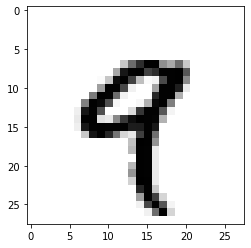

In [35]:
digit = train_images[4] # 5th element
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients
between 0 and 255.

In [52]:
#### Selecting with tensors in Numpy

In [27]:
my_slice = train_images[10:100]

In [28]:
# Selected 90 hand-written digits
my_slice.shape

(90, 28, 28)

In [29]:
# results in the same slice
my_slice = train_images[10:100, :, :]

In [59]:
# or more verbose
my_slice = train_images[10:100, 0:28, 0:28]

In [30]:
# but we could focus only on a subset of the pixel for each picture (lower right part of the picture)
my_slice = train_images[:, 14:, 14:]

In [31]:
my_slice.shape

(60000, 14, 14)

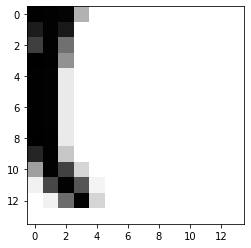

In [32]:
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [37]:
# Or, like negative indices in Python lists
my_slice = train_images[:, 7:-7, 7:-7]

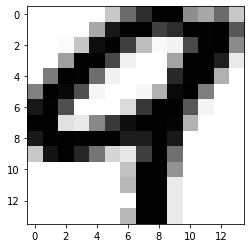

In [38]:
digit = my_slice[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### The notion of data batches
In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be the samples axis (sometimes called the samples
dimension). In the MNIST example, samples are images of digits.

In [44]:
# Example batching for the n-th batch
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [41]:
batch.shape

(128, 28, 28)

#### Real world examples of tensors
1. vector data : 2d tensors (sample, features)
2. timeseries: 3d tensors (sample, timestep, feature)
3. image: 4d tensors (sample, height, width, channel (color)) 
4. video: 5d tensors (sample, frames, height, width, channel)

<img src="resources/img2.png">

<img src="resources/img3.png">

### 3. Tensor Operations

In [ ]:
# keras.layers.Dense(512, activation='relu') 
# equals
# output = relu(dot(W, input) + b) 

In [64]:
# Elementwise operations allow us to parallize many computations.
# The elementwise operations are implemented with numpy array, so nothing changes here.

# Example 
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

#### Broadcasting
We will encouter many situation in which we want to work with different dimensioned vectors, 
however our naive approach with numpy does not work here. Thus, keras supports a method to "broadcast" the dimension - i.e., artificially match the dimension of vectors without creating objects in the memory. 

#### Tensor Dot 
Computes the dot product betweet two tensors - e.g., two vectors -> inner product

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

**Not** to be confused with the elementwise product.

In [67]:
# Example tensor dot computation
import numpy as np
z = np.dot(x, x)

#### Tensor Reshaping
Finally, tensor reshaping. We have already used this method in previous workshops to change the shape of arrays. 

In [69]:
train_images = train_images.reshape((60000, 28 * 28))

### 4. Task - Create a Neural Network which can identify whether a number is 4 or not.

In [ ]:
# What needs to change? Which activation function at the output node? Which loss function to take?

In [ ]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Build Network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1, activation='softmax'))

# Compile network 
network.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [45]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Create Binary Case
train_labels = np.where(train_labels==4, 1, 0)
test_labels = np.where(test_labels==4, 1, 0)

# Build Network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1, activation='sigmoid'))

# Compile network 
network.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Get the metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.2089 - accuracy: 0.9204
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.1130 - accuracy: 0.9657
Epoch 3/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.0884 - accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.0768 - accuracy: 0.9773
Epoch 5/5
10000/10000 [==============================] - 2s 229us/step


### 5. Sentiment Analysis with Neural Networks - Classifying movie reviews 

IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [53]:
# loading the data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [48]:
# Represents a review.
# Each word is encoded (for example the word "boring" could have the numerical code 17)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [103]:
# Training Label
# 0 stands for negative, 1 for positive

In [49]:
train_labels[0]

1

In [50]:
# Decoding a review for illustration purpose
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [51]:
# print decoded review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [54]:
# Transforming input data to suitable format 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Task: 
Develop a Deep Neural Network with Input Layer, Hidden Layer (16 Nodes), Hidden Layer (16 Nodes) 
and 1 Output. 

1. Use RELU for the hidden layer activations and a sigmoid actitvation function for the output layer.
2. Use Stochastic Gradient Descent to optimize the network
3. Select an appropriate loss function and metric 


What happens when you increase the epoch (from perhaps 3 to 10)? 
Also, analyze what happens when you vary the batch size?
Analyze what happens when you add one more hidden layer?

In [55]:
# Solution
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=2, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/2
25000/25000 [==============================] - 14s 563us/step - loss: 0.4341 - accuracy: 0.8056
Epoch 2/2
25000/25000 [==============================] - 9s 377us/step


In [56]:
# Print results (loss, accuracy)
results 

[0.29039480045318605, 0.8814399838447571]

In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/10
25000/25000 [==============================] - 12s 462us/step - loss: 0.4538 - accuracy: 0.7959
Epoch 2/10
25000/25000 [==============================] - 10s 415us/step - loss: 0.2849 - accuracy: 0.8846
Epoch 3/10
25000/25000 [==============================] - 11s 445us/step - loss: 0.2429 - accuracy: 0.9028
Epoch 4/10
25000/25000 [==============================] - 11s 456us/step - loss: 0.2172 - accuracy: 0.9136
Epoch 5/10
25000/25000 [==============================] - 12s 479us/step - loss: 0.1977 - accuracy: 0.9233
Epoch 6/10
25000/25000 [==============================] - 13s 530us/step - loss: 0.1814 - accuracy: 0.9298
Epoch 7/10
25000/25000 [==============================] - 16s 630us/step - loss: 0.1658 - accuracy: 0.9358
Epoch 8/10
25000/25000 [==============================] - 10s 412us/step - loss: 0.1546 - accuracy: 0.9403
Epoch 9/10
25000/25000 [==============================] - 10s 382us/step - loss: 0.1404 - accuracy: 0.9461
Epoch 10/10
25000/25000 [============

In [58]:
# Print results (loss, accuracy)
results 

[0.41674027655601503, 0.8583999872207642]

In [59]:
# Less backprop steps
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=1024)

results = model.evaluate(x_test, test_labels)

Epoch 1/10
25000/25000 [==============================] - 3s 134us/step - loss: 0.6929 - accuracy: 0.5083
Epoch 2/10
25000/25000 [==============================] - 3s 105us/step - loss: 0.6904 - accuracy: 0.5325
Epoch 3/10
25000/25000 [==============================] - 3s 108us/step - loss: 0.6877 - accuracy: 0.5555
Epoch 4/10
25000/25000 [==============================] - 3s 128us/step - loss: 0.6843 - accuracy: 0.5747
Epoch 5/10
25000/25000 [==============================] - 4s 145us/step - loss: 0.6798 - accuracy: 0.5966
Epoch 6/10
25000/25000 [==============================] - 3s 119us/step - loss: 0.6740 - accuracy: 0.6256
Epoch 7/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.6666 - accuracy: 0.6629
Epoch 8/10
25000/25000 [==============================] - 3s 128us/step - loss: 0.6578 - accuracy: 0.6908
Epoch 9/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.6477 - accuracy: 0.7120
Epoch 10/10
25000/25000 [=====================

In [ ]:
# Results
results

In [125]:
# A model which might be prone to overfitting
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(x_train, train_labels, epochs=10, batch_size=16)

results = model.evaluate(x_test, test_labels)

Epoch 1/10
25000/25000 [==============================] - 22s 888us/step - loss: 0.4418 - accuracy: 0.8036
Epoch 2/10
25000/25000 [==============================] - 24s 965us/step - loss: 0.2809 - accuracy: 0.8850
Epoch 3/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.2360 - accuracy: 0.9067
Epoch 4/10
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2061 - accuracy: 0.9195
Epoch 5/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.1822 - accuracy: 0.9311
Epoch 6/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.1595 - accuracy: 0.9397
Epoch 7/10
25000/25000 [==============================] - 26s 1ms/step - loss: 0.1371 - accuracy: 0.9500
Epoch 8/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1136 - accuracy: 0.9600
Epoch 9/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.0932 - accuracy: 0.9676
Epoch 10/10
25000/25000 [==========================

In [126]:
# overfitted results
results

[0.44799849729061125, 0.8535199761390686]

### Few last words: using a trained network to generate predictions



In [60]:
model.predict(x_test) # <- Here, you can pass any data...

array([[0.50022656],
       [0.56113535],
       [0.5526082 ],
       ...,
       [0.4456405 ],
       [0.4747773 ],
       [0.4918237 ]], dtype=float32)